In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [8]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [11]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [13]:
df.describe().astype(int)

,uid,stars,reviews,price,boughtInLastMonth
count,2443651,2443651,2443651,2443651,2443651
mean,1370545,2,480,89,25
std,816056,2,5944,345,240
min,1,0,0,0,0
25%,658921,0,0,9,0
50%,1349029,0,0,19,0
75%,2060685,4,59,45,0
max,2828593,5,1356658,100000,50000


# Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. Frequency Tables:

- Generate a frequency table for the product category.
- Which are the top 5 most listed product categories?

In [6]:
frequency_table = df["category"].value_counts().sort_values(ascending=False)
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Plugs                                        107
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

The top 5 most listed product categories are: "Sports & Outdoors", "Beauty", "Handmade Clothing, Shoes & Accessories", "Bath & Body", and "Birthday Gifts".

2. Visualizations:

- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [38]:
frequency_table[:10]

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64

/var/folders/3j/f7d6p9t136x34vdmdy30wrrc0000gn/T/ipykernel_1646/641666677.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table[:10].index, y=frequency_table[:10].values , palette="Set3")


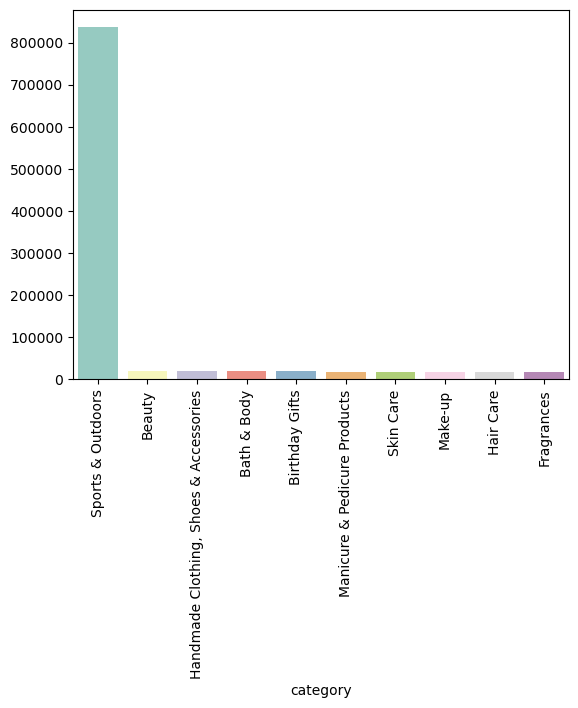

In [7]:
sns.barplot(x=frequency_table[:10].index, y=frequency_table[:10].values , palette="Set3")
plt.xticks(rotation=90)
plt.show();

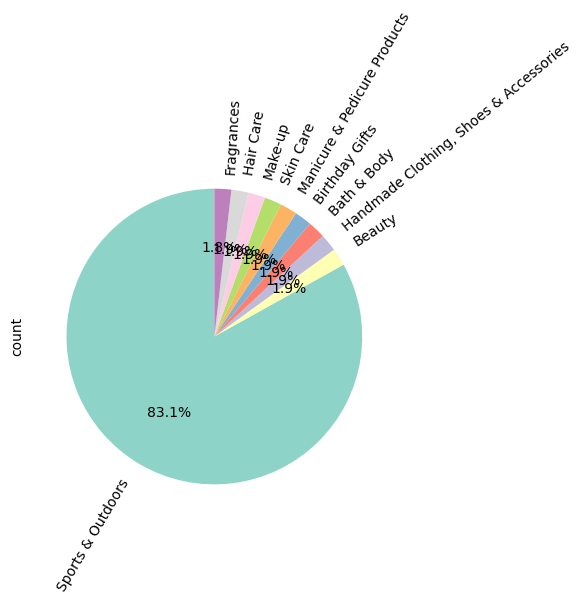

In [9]:
frequency_table[:10].plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"), rotatelabels=True)
plt.show();

Sports & Outdoors dominates the top listings, representing 83.1% of the top 10 categories.

# Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. Measures of Centrality:

- Calculate the mean, median, and mode for the price of products.
- What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [47]:
df["price"].describe().round(2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [12]:
df["price"].mode()[0]

9.99

In [13]:
# Upper whisker
45.99 + 1.5 * (45.99-9.99)

99.99000000000001

In [15]:
# Lower whisker
9.99 - 1.5 * (45.99-9.99)

-44.01

- The mean (or average price point of products listed) is 89,24
- The median is 19,09
- The mode is 9,99
- There's a big difference between the the mean and the mode, and also considering that the Q3 is 45,99 and the max shows 100000, we can expect to have big outliers in the data. 

2. Measures of Dispersion:

- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?

In [59]:
# Variance
df["price"].var()

119445.48532256528

In [60]:
# Standard Deviation
df["price"].std()

345.60886175352226

In [61]:
# Range
df["price"].max() - df["price"].min()

100000.0

In [16]:
# Interquartile Range
print(f"The interquartile range is between {df["price"].quantile(0.25)} and {df["price"].quantile(0.75)}")
print(f"The interquartile range is {df["price"].quantile(0.75) - df["price"].quantile(0.25)}")

The interquartile range is between 9.99 and 45.99
The interquartile range is 36.0


Yes, a mean significantly higher than the Q3, a max with a large difference, and a standard deviation higher than the mean are some indicators of a significant spread in prices.

3. Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
- If its hard to read these diagrams, think why this is, and explain how it could be solved..
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

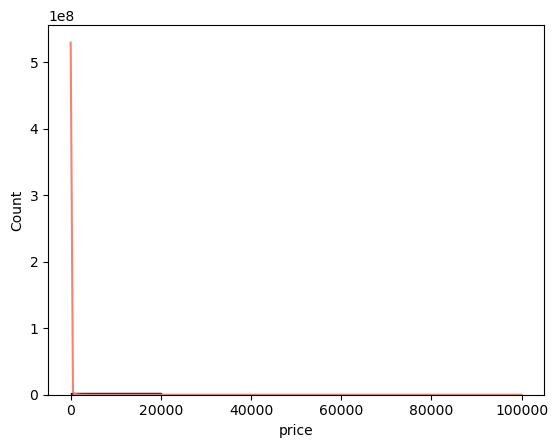

In [17]:
sns.histplot(df["price"], kde=True, bins=5, color="salmon")
plt.show();

With a very large amount on data, most products in the lower price range, and some product prices significantly spread in the data (reaching 100000), the histogram doesn't prove useful. We could potentially solve this issue by eliminating outliers. An option is creating a histogram with only products below the upper whisker.

In [21]:
df_below_Uw = df[df['price'] < 100]

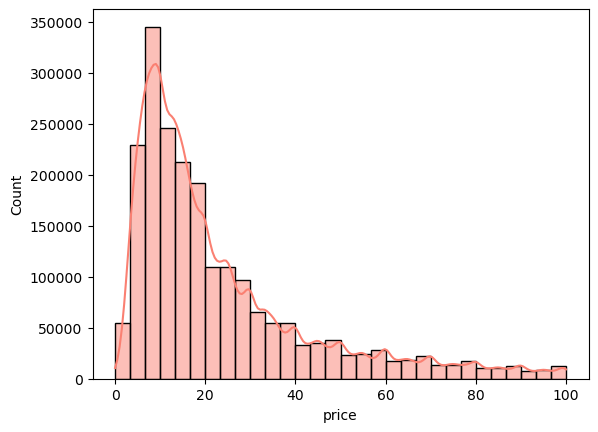

In [19]:
sns.histplot(df_below_Uw["price"], kde=True, bins=30, color="salmon")
plt.show();

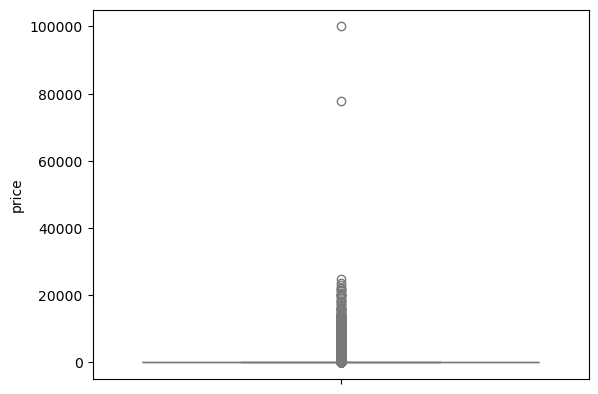

In [84]:
# Boxplot with all data
sns.boxplot(data = df['price'], color="lightblue")
plt.show();

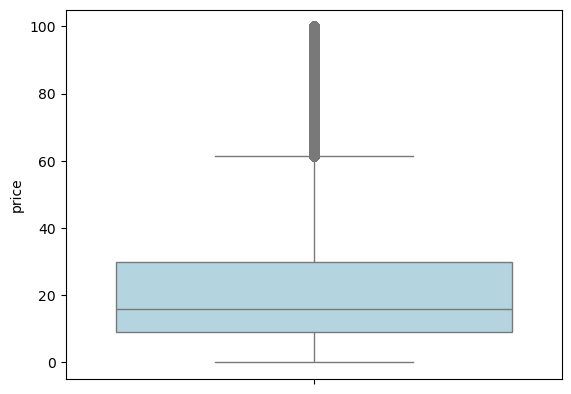

In [22]:
# Boxplot with data with price below Q3
sns.boxplot(data = df_below_Uw["price"], color="lightblue")
plt.show();

# Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. Measures of Centrality:

- Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend?

In [91]:
df["stars"].describe().round(2)

count    2443651.00
mean           2.15
std            2.19
min            0.00
25%            0.00
50%            0.00
75%            4.40
max            5.00
Name: stars, dtype: float64

In [96]:
df["stars"].median()

0.0

In [97]:
df["stars"].mode()

0    0.0
Name: stars, dtype: float64

More than half (1225641 our of 2443651) of the customers have rated 0.0 stars, which likely means they didn't rate at all, as normally rating systems don't allow for a 0 rate. If we drop columns with 0.0 stars, our numbers change:

In [23]:
df_no0 = df[df["stars"] != 0.0]

In [100]:
df_no0["stars"].describe().round(2)

count    1218010.00
mean           4.32
std            0.56
min            1.00
25%            4.10
50%            4.40
75%            4.60
max            5.00
Name: stars, dtype: float64

In [101]:
df_no0["stars"].mean()

4.31916076222691

In [102]:
df_no0["stars"].mode()

0    4.5
Name: stars, dtype: float64

We can see that a big majority of the people who actually rate (over 75%) tend to rate above 4 stars.

2. Measures of Dispersion:

- Determine the variance, standard deviation, and interquartile range for product rating.
- Are the ratings consistent, or is there a wide variation in customer feedback?

In [103]:
df["stars"].var()

4.81743402976196

In [26]:
df_no0["stars"].var()

0.3083433752380519

In [104]:
df["stars"].std()

2.1948653785054697

In [24]:
df_no0["stars"].std()

0.5552867504614637

In [28]:
# Interquartile Range
print(f"The interquartile range is between {df_no0["stars"].quantile(0.25)} and {df_no0["stars"].quantile(0.75)}")
print(f"IQR without 0 values: {df_no0["stars"].quantile(0.75) - df_no0["stars"].quantile(0.25)}")

The interquartile range is between 4.1 and 4.6
IQR without 0 values: 0.5


In [32]:
# Uw
4.6 + 1.5 * 0.5

5.35

In [31]:
# Lw
4.1 - 1.5 * 0.5

3.3499999999999996

The ratings in the data have a wide variation. However, assuming 0.0 means no rate at all, the ratings are actually consistent above the 4 points.

3. Shape of the Distribution:

- Calculate the skewness and kurtosis for the rating column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?

In [33]:
df_no0["stars"].skew()

-2.3795681122127945

In [34]:
df_no0["stars"].kurtosis()

9.78193769066435

The ratings lean towards upper values.

4. Visualizations:

- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

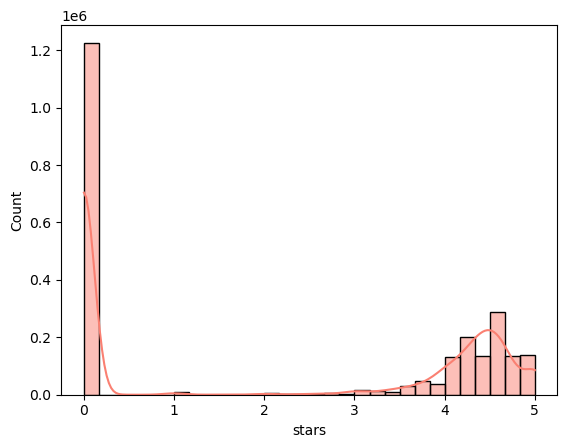

In [108]:
sns.histplot(df["stars"], kde=True, bins=30, color="salmon")
plt.show();

We can see that, as mentioned before, 0.0 is the most common rating in the dataframe. However, if we exlude 0.0 for the histogram, we see that most ratings are above the 4 points.

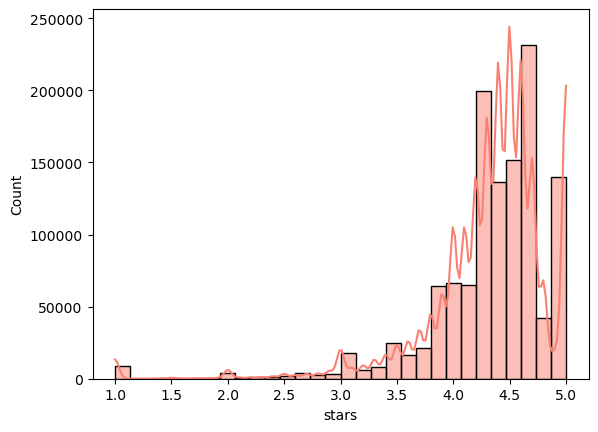

In [109]:
sns.histplot(df_no0["stars"], kde=True, bins=30, color="salmon")
plt.show();